# 1. Merge data

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import seaborn as sns
shanghai_ranking = pd.read_csv('data/Shanghai_ranking_data_2023.csv')
shanghai_ranking.Name = shanghai_ranking.Name.astype(str).str.strip()
THE_ranking = pd.read_csv('data/THE_ranking_data_2023.csv')
THE_ranking.Name = THE_ranking.Name.astype(str).str.strip()
qs_ranking = pd.read_csv('data/QS_ranking_data_2023.csv')
qs_ranking.Name = qs_ranking.Name.astype(str).str.strip()

In [4]:
# THE_ranking = pd.read_csv('data/THE_ranking_data.csv')
# for index, item in enumerate(THE_ranking.RankTHE):
#     item = item.replace('–','-')
#     THE_ranking.at[index,'RankTHE'] = item
# THE_ranking.to_csv('output.csv')

In [14]:
THE_ranking=THE_ranking.drop(np.where(THE_ranking.RankTHE=='Reporter')[0])
THE_ranking

,Unnamed: 0,RankTHE,Name,No. of FTE students,No. of students per staff,International Students,Female:Male Ratio,Overall,Teaching,Research Environment,Research Quality,Industry,International Outlook
0,0,1,University of Oxford,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,1,2,Harvard University,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,2,=3,University of Cambridge,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,=3,Stanford University,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,4,5,Massachusetts Institute of Technology,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,1653,1501+,West University of Timişoara,"14,527",24.6,6%,66 : 34,10.4–18.3,18.7,13.4,16.8,37.7,28.7
1654,1654,1501+,Wrocław University of Science and Technology,"23,657",20.3,6%,35 : 65,10.4–18.3,17.9,16.0,14.9,45.5,27.3
1655,1655,1501+,Yamaguchi University,"10,724",11.1,7%,38 : 62,10.4–18.3,21.3,12.3,13.9,43.8,30.4
1656,1656,1501+,Yanshan University,"38,649",13.2,1%,39 : 61,10.4–18.3,17.2,10.9,18.3,46.9,17.0


In [15]:
def merge(Rank1:pd.DataFrame, Rank2:pd.DataFrame, bias) -> pd.DataFrame:
    import Levenshtein
    distance = np.empty((len(Rank1.Name),len(Rank2.Name)))
    Rank1 = Rank1.rename(columns={'Name':'Name1'})
    Rank2 = Rank2.rename(columns={'Name':'Name2'})
    for index1, rank1 in enumerate(Rank1.Name1):
        for index2, rank2 in enumerate(Rank2.Name2):
            distance[index1, index2] = Levenshtein.distance(rank1, rank2)
    merged_rank = pd.DataFrame({})
    for i in range(distance.shape[0]):
        j = np.argmin(distance[i, :])
        if distance[i, j] == bias:
            merged_row = pd.concat([Rank1.iloc[i], Rank2.iloc[j]], axis=0)
            merged_row = merged_row.to_frame().T
            merged_rank = pd.concat([merged_rank, merged_row])
    merged_rank = merged_rank.reset_index(drop=True)
    return merged_rank


def clean(merged_rank:pd.DataFrame, row=[]) -> pd.DataFrame:
    for i in row:
        merged_rank = merged_rank.drop(i)
    merged_rank = merged_rank.drop('Name2',axis=1)
    merged_rank = merged_rank.rename(columns={'Name1':'Name'}).reset_index(drop=True) 
    return merged_rank

You need to check manually if the names are same for distance >1 

In [16]:
merged_rank1 = merge(shanghai_ranking,qs_ranking,0)
merged_rank1 = clean(merged_rank1)
merged_rank2 = merge(shanghai_ranking,qs_ranking,1)
merged_rank2 = clean(merged_rank2)
merged_rank = pd.concat([merged_rank1,merged_rank2])
merged_rank = merged_rank.reset_index(drop=True)



In [17]:
merged_rank1 = merge(merged_rank,THE_ranking,0)
merged_rank1 = clean(merged_rank1)
merged_rank2 = merge(merged_rank,THE_ranking,1)
merged_rank2 = clean(merged_rank2)
merged_rank = pd.concat([merged_rank1,merged_rank2])
merged_rank = merged_rank.reset_index(drop=True)
merged_rank

,RankShangHai,Name,Region,Regional rank,Total score,Alumni,Award,Hici,N&S,PUB,...,No. of FTE students,No. of students per staff,International Students,Female:Male Ratio,Overall,Teaching,Research Environment,Research Quality,Industry,International Outlook
0,1,Harvard University,us,1,100.0,100.0,92.6,100.0,100.0,100.0,...,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
1,2,Stanford University,us,2,74.8,45.6,88.1,73.6,82.8,67.5,...,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
2,4,University of Cambridge,gb,1,67.9,78.9,90.8,45.1,61.0,63.6,...,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,6,Princeton University,us,5,60.1,61.7,100.0,32.9,50.4,39.4,...,"8,279",8.0,23%,46 : 54,92.4,87.6,95.9,99.1,66.0,80.3
4,7,University of Oxford,gb,2,59.5,49.9,59.7,51.4,57.6,71.4,...,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,301-400,University of Milano-Bicocca,it,9-10,NaN,23.1,0.0,11.4,7.2,34.2,...,"29,057",29.2,5%,62 : 38,47.0–48.7,24.9,25.9,93.6,40.8,43.0
331,601-700,Umea University,se,11,NaN,15.5,0.0,0.0,9.7,29.1,...,"18,218",12.6,11%,61 : 39,42.1–44.9,21.9,29.6,78.4,38.5,64.5
332,101-150,Xi'an Jiaotong University,cn,11-23,NaN,20.3,0.0,18.6,16.4,70.6,...,"44,942",14.1,6%,35 : 65,39.3–42.0,36.4,42.7,47.1,75.0,29.4
333,151-200,Aix Marseille University,fr,6-8,NaN,19.0,0.0,18.6,21.5,48.1,...,"70,054",17.4,13%,60 : 40,47.0–48.7,40.5,24.9,72.3,41.5,63.2


# French universities

In [18]:
sample_rank = merged_rank.loc[:,['Name','Region','RankShangHai','RankQS','RankTHE']]

#extraire les universités françaises
french_rank = sample_rank[sample_rank['Region'] == 'fr']
french_rank

,Name,Region,RankShangHai,RankQS,RankTHE
24,Sorbonne University,fr,46,60,90
37,Université Paris Cité,fr,69,248=,=114
75,Université Grenoble Alpes,fr,101-150,317=,401-500
137,University of Bordeaux,fr,201-300,521-530,301-350
170,Institut Polytechnique de Paris,fr,301-400,48,=95
333,Aix Marseille University,fr,151-200,490=,301-350


In [19]:
#sample_rank = merged_rank.loc[:,['Name','RankShangHai','RankQS','RankTHE']]

def level(rank, rankname):
    for index, item in enumerate(rank[rankname]):
        item = str(item)
        if '=' in item:
            rank.at[index, rankname] = item.replace('=', '')
        if '+' in item:
            rank.at[index, rankname] = item.replace('+', '')
        if '-' in item:
            numbers = item.split('-')
            num1, num2 = map(int, numbers)
            avg = str(int((num1 + num2) / 2))
            rank.at[index, rankname] = avg
    rank[rankname] = pd.to_numeric(rank[rankname], errors='coerce')  # Convertit la colonne en nombres, NaN si la conversion échoue
    rank = rank.dropna(subset=[rankname])  # Supprime les lignes avec des valeurs NaN
    rank[rankname] = rank[rankname].astype(int)
    rank = rank.reset_index(drop=True)
    return rank

sample_rank = level(sample_rank,'RankQS')
sample_rank = level(sample_rank,'RankTHE')
sample_rank = level(sample_rank,'RankShangHai')
sample_rank.RankQS = sample_rank.RankQS.astype(int)
sample_rank.RankTHE = sample_rank.RankTHE.astype(int)
sample_rank.RankShangHai = sample_rank.RankShangHai.astype(int)
#sample_rank

'''******************************'''
french_rank2 = sample_rank[sample_rank['Region'] == 'fr']
sample_rank = french_rank2.loc[:,['Name','RankShangHai','RankQS','RankTHE']]
sample_rank

,Name,RankShangHai,RankQS,RankTHE
24,Sorbonne University,46,60,90
37,Université Paris Cité,69,248,114
75,Université Grenoble Alpes,125,317,450
137,University of Bordeaux,250,525,325
170,Institut Polytechnique de Paris,350,48,95
333,Aix Marseille University,175,490,325


In [20]:
def MJ(rank):
    rank_number = rank.shape[1] - 1
    rank = rank.set_index('Name')
    rank['MedianRank'] = rank.median(axis=1)
    rank['RankMJ'] = 0
    rank['Temp'] = 0.0
    unique_medians = rank['MedianRank'].unique()
    sorted_medians = sorted(unique_medians)
    
    rankMJ = 1  # Initialize ranking
    # Sort schools within each median grouping
    for median in sorted_medians:
        # Find all universities with the same median ranking
        tied_df = rank[rank['MedianRank'] == median]
        
        # If there is only one university, the current ranking is assigned directly
        if len(tied_df) == 1:
            rank.loc[tied_df.index, 'RankMJ'] = rankMJ
            rankMJ += 1
        else:
            # If multiple universities are tied, the order will be assigned based on the median of the other rankings.
            for i in range(len(tied_df)):
                t = []
                label = False
                for j in range(rank_number):
                    if tied_df.iloc[[i],[j]].values == tied_df.iloc[[i],[rank_number]].values and label == False:
                        label = True
                    else:
                        t.append(tied_df.iloc[[i],[j]].values)
                tied_df.iloc[[i],[rank_number+2]] = np.median(t)
            tied_df = tied_df.sort_values(by='Temp')
            aaa = tied_df['Temp'].value_counts()
            #Assign ranking
            cal=0
            for idx in tied_df.index:
                rank.loc[idx, 'NewMedianRank'] = tied_df.loc[idx,'Temp']
                rank.loc[idx, 'RankMJ'] = rankMJ
                cal += 1
                if tied_df.loc[idx,'Temp'] in aaa.index:
                    if cal == aaa[tied_df.loc[idx,'Temp']]:
                        rankMJ += aaa[tied_df.loc[idx,'Temp']]
                        cal=0
    rank = rank.drop('NewMedianRank', axis=1)
    rank = rank.drop('MedianRank', axis=1)
    return rank.drop('Temp', axis=1)

RankMJ1 = MJ(sample_rank)
RankMJ1

,RankShangHai,RankQS,RankTHE,RankMJ
Name,,,,
Sorbonne University,46,60,90,1
Université Paris Cité,69,248,114,3
Université Grenoble Alpes,125,317,450,4
University of Bordeaux,250,525,325,6
Institut Polytechnique de Paris,350,48,95,2
Aix Marseille University,175,490,325,5


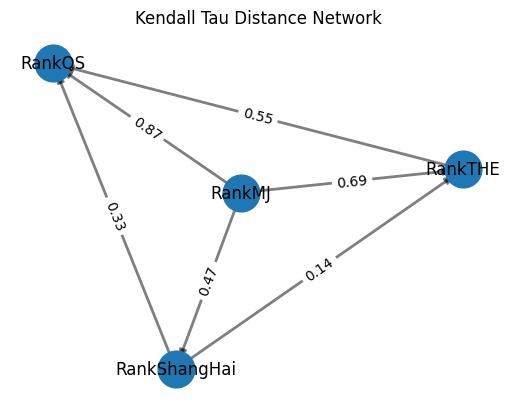

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import seaborn as sns

rank_name_list = ['RankMJ', 'RankShangHai', 'RankTHE', 'RankQS']

sub_rank = RankMJ1.loc[:, rank_name_list]

tau = np.zeros([sub_rank.shape[1], sub_rank.shape[1]])
for i in range(sub_rank.shape[1]):
    for j in range(sub_rank.shape[1]):
        tau[i, j], _ = kendalltau(sub_rank.iloc[:, i], sub_rank.iloc[:, j])

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each ranking
for rank_name in rank_name_list:
    G.add_node(rank_name)

# Add edges between rankings with non-zero Kendall Tau distance
for i in range(len(rank_name_list)):
    for j in range(i+1, len(rank_name_list)):
        tau_value = tau[i][j]
        if tau_value != 0:
            G.add_edge(rank_name_list[i], rank_name_list[j], weight=tau_value)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2, arrows=True, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})
plt.title('Kendall Tau Distance Network')
plt.axis('off')
plt.show()


# Kendal Tau Distance

In [12]:
rank_name_list = ['RankMJ','RankShangHai','RankTHE','RankQS']
sub_rank = RankMJ1.loc[:,rank_name_list]


tau = np.zeros([sub_rank.shape[1],sub_rank.shape[1]])
for i in range(sub_rank.shape[1]):
    for j in range(sub_rank.shape[1]):
        tau[i,j],_ = kendalltau(sub_rank.iloc[:,i],sub_rank.iloc[:,j])

#ax = sns.heatmap(tau,annot=True,xticklabels=rank_name_list,yticklabels=rank_name_list)
ax.set_title('Tau between different ranking')

NameError: name 'ax' is not defined

In [35]:
sample_rank2 = merged_rank.loc[:, ['Name','Alumni','Hici','PUB','PCP']]
sample_rank2

,Name,Alumni,Hici,PUB,PCP
0,Harvard University,100.0,100.0,100.0,86.7
1,Stanford University,45.6,73.6,67.5,58.0
2,University of Cambridge,78.9,45.1,63.6,60.4
3,Princeton University,61.7,32.9,39.4,76.7
4,University of Oxford,49.9,51.4,71.4,48.5
...,...,...,...,...,...
330,University of Milano-Bicocca,23.1,11.4,34.2,23.1
331,Umea University,15.5,0.0,29.1,15.5
332,Xi'an Jiaotong University,20.3,18.6,70.6,20.3
333,Aix Marseille University,19.0,18.6,48.1,19.0


In [36]:
sample_rank2 = merged_rank.loc[:, ['Name','Alumni','Hici','PUB','PCP']]
sample_rank2['RankAlumni'] = sample_rank2.Alumni.rank(method='average',ascending=False).astype(int)
sample_rank2 = sample_rank2.drop('Alumni',axis=1) 
sample_rank2['RankHici'] = sample_rank2.Hici.rank(method='average',ascending=False).astype(int)
sample_rank2 = sample_rank2.drop('Hici',axis=1) 
sample_rank2['RankPUB'] = sample_rank2.PUB.rank(method='average',ascending=False).astype(int)
sample_rank2 = sample_rank2.drop('PUB',axis=1) 
sample_rank2['RankPCP'] = sample_rank2.PCP.rank(method='average',ascending=False).astype(int)
sample_rank2 = sample_rank2.drop('PCP',axis=1) 
sample_rank2

,Name,RankAlumni,RankHici,RankPUB,RankPCP
0,Harvard University,1,1,1,1
1,Stanford University,7,2,16,4
2,University of Cambridge,2,10,23,3
3,Princeton University,3,30,128,2
4,University of Oxford,6,5,12,5
...,...,...,...,...,...
330,University of Milano-Bicocca,96,186,177,103
331,Umea University,261,317,245,265
332,Xi'an Jiaotong University,153,98,13,158
333,Aix Marseille University,178,98,72,183


In [37]:
RankMJ2 = MJ(sample_rank2)
RankMJ2

,RankAlumni,RankHici,RankPUB,RankPCP,RankMJ
Name,,,,,
Harvard University,1,1,1,1,1
Stanford University,7,2,16,4,2
University of Cambridge,2,10,23,3,4
Princeton University,3,30,128,2,11
University of Oxford,6,5,12,5,2
...,...,...,...,...,...
University of Milano-Bicocca,96,186,177,103,138
Umea University,261,317,245,265,277
Xi'an Jiaotong University,153,98,13,158,124


KJ

In [22]:
sample = RankMJ1.copy()
sample['RankTHE']= sample['RankTHE'].rank()
sample['RankQS']= sample['RankQS'].rank()
sample['RankShangHai']= sample['RankShangHai'].rank()
sample

,RankShangHai,RankQS,RankTHE,RankMJ
Name,,,,
Sorbonne University,1.0,2.0,1.0,1
Université Paris Cité,2.0,3.0,3.0,3
Université Grenoble Alpes,3.0,4.0,6.0,4
University of Bordeaux,5.0,6.0,4.5,6
Institut Polytechnique de Paris,6.0,1.0,2.0,2
Aix Marseille University,4.0,5.0,4.5,5


In [30]:
def compair(criterion, column_name1, column_name2, position):

    criterion = criterion.copy()
    criterion['gap1']= abs(position - criterion[column_name1])
    criterion['gap2']= abs(position - criterion[column_name2])

    criterion['gap_final']= np.minimum(criterion['gap1'],criterion['gap2'])
    return criterion

def construi(criterion, column_name1, column_name2):
    temp_list = []
    criterion = criterion.copy()
    for i in range(criterion.shape[0]):    
        criterion_temp = compair(criterion, column_name1, column_name2, position=i)
        criterion_temp = criterion_temp[~criterion_temp['Name'].isin(temp_list)]
        value_index = criterion_temp['gap_final'].idxmin()
        temp_list.append(criterion_temp.loc[value_index]['Name'])
        
        criterion_final = pd.DataFrame(temp_list,columns=['Name']).reset_index()
        criterion_final = criterion_final.rename(columns={'index':'merged_rank1'})
        criterion_final = pd.merge(criterion, criterion_final, on='Name')
    return criterion_final

compair(sample,'RankQS','RankTHE',0)

,RankShangHai,RankQS,RankTHE,RankMJ,gap1,gap2,gap_final
Name,,,,,,,
Sorbonne University,1.0,2.0,1.0,1,2.0,1.0,1.0
Université Paris Cité,2.0,3.0,3.0,3,3.0,3.0,3.0
Université Grenoble Alpes,3.0,4.0,6.0,4,4.0,6.0,4.0
University of Bordeaux,5.0,6.0,4.5,6,6.0,4.5,4.5
Institut Polytechnique de Paris,6.0,1.0,2.0,2,1.0,2.0,1.0
Aix Marseille University,4.0,5.0,4.5,5,5.0,4.5,4.5


In [31]:
QS_THE = construi(sample.reset_index(),'RankQS','RankTHE')
QS_THE

,Name,RankShangHai,RankQS,RankTHE,RankMJ,merged_rank1
0,Sorbonne University,1.0,2.0,1.0,1,0
1,Université Paris Cité,2.0,3.0,3.0,3,2
2,Université Grenoble Alpes,3.0,4.0,6.0,4,3
3,University of Bordeaux,5.0,6.0,4.5,6,4
4,Institut Polytechnique de Paris,6.0,1.0,2.0,2,1
5,Aix Marseille University,4.0,5.0,4.5,5,5


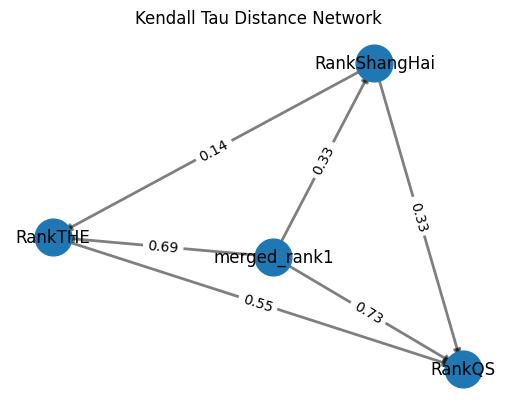

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import seaborn as sns

rank_name_list = ['merged_rank1', 'RankShangHai', 'RankTHE', 'RankQS']


sub_rank = QS_THE.loc[:, rank_name_list]

tau = np.zeros([sub_rank.shape[1], sub_rank.shape[1]])
for i in range(sub_rank.shape[1]):
    for j in range(sub_rank.shape[1]):
        tau[i, j], _ = kendalltau(sub_rank.iloc[:, i], sub_rank.iloc[:, j])

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each ranking
for rank_name in rank_name_list:
    G.add_node(rank_name)

# Add edges between rankings with non-zero Kendall Tau distance
for i in range(len(rank_name_list)):
    for j in range(i+1, len(rank_name_list)):
        tau_value = tau[i][j]
        if tau_value != 0:
            G.add_edge(rank_name_list[i], rank_name_list[j], weight=tau_value)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2, arrows=True, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})
plt.title('Kendall Tau Distance Network')
plt.axis('off')
plt.show()


In [104]:
kendalltau(QS_THE.merged_rank1,QS_THE.RankTHE)[0],kendalltau(QS_THE.merged_rank1,QS_THE.RankShangHai)[0],kendalltau(QS_THE.merged_rank1,QS_THE.RankQS)[0],kendalltau(QS_THE.merged_rank1,QS_THE.RankMJ)[0],

(0.6900655593423543,
 0.3333333333333333,
 0.7333333333333333,
 0.8666666666666666)

In [25]:
QS_THE = construi(sample.reset_index(),'RankQS','RankTHE')
QS_THE = QS_THE.rename(columns={'merged_rank1':'QS_THE'})

THE_SH = construi(RankMJ1.reset_index(),'RankShangHai','RankTHE')
THE_SH = THE_SH.rename(columns={'merged_rank1':'THE_SH'})
THE_SH.drop(['RankMJ','RankQS','RankShangHai','RankTHE'],inplace=True,axis=1)
QS_THE_SH = pd.merge(QS_THE,THE_SH,on='Name')
QS_THE_SH = construi(QS_THE_SH.reset_index(),'QS_THE','THE_SH')
QS_THE_SH


,index,Name,RankShangHai,RankQS,RankTHE,RankMJ,QS_THE,THE_SH,merged_rank1
0,0,Sorbonne University,1.0,2.0,1.0,1,0,0,0
1,1,Université Paris Cité,2.0,3.0,3.0,3,2,1,1
2,2,Université Grenoble Alpes,3.0,4.0,6.0,4,3,3,3
3,3,University of Bordeaux,5.0,6.0,4.5,6,4,5,4
4,4,Institut Polytechnique de Paris,6.0,1.0,2.0,2,1,2,2
5,5,Aix Marseille University,4.0,5.0,4.5,5,5,4,5


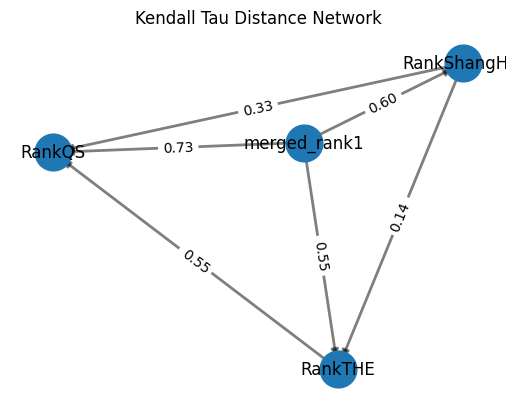

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import seaborn as sns

rank_name_list = ['merged_rank1', 'RankShangHai', 'RankTHE', 'RankQS']


sub_rank = QS_THE_SH.loc[:, rank_name_list]

tau = np.zeros([sub_rank.shape[1], sub_rank.shape[1]])
for i in range(sub_rank.shape[1]):
    for j in range(sub_rank.shape[1]):
        tau[i, j], _ = kendalltau(sub_rank.iloc[:, i], sub_rank.iloc[:, j])

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each ranking
for rank_name in rank_name_list:
    G.add_node(rank_name)

# Add edges between rankings with non-zero Kendall Tau distance
for i in range(len(rank_name_list)):
    for j in range(i+1, len(rank_name_list)):
        tau_value = tau[i][j]
        if tau_value != 0:
            G.add_edge(rank_name_list[i], rank_name_list[j], weight=tau_value)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2, arrows=True, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})
plt.title('Kendall Tau Distance Network')
plt.axis('off')
plt.show()


Kendal taus of:
1. QS_THE_SH & THE
2. QS_THE_SH & SH
3. QS_THE_SH & QS
4. QS_THE_SH & MJ
5. MJ & THE
6. MJ & SH
7. MJ & QS
8. QS_THE_SH & MJ

In [110]:
kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankTHE)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankShangHai)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankQS)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankMJ)[0],kendalltau(QS_THE_SH.RankMJ,QS_THE_SH.RankTHE)[0],kendalltau(QS_THE_SH.RankMJ,QS_THE_SH.RankShangHai)[0],kendalltau(QS_THE_SH.RankMJ,QS_THE_SH.RankQS)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankMJ)[0],

(0.5520524474738833,
 0.4666666666666666,
 0.6,
 0.7333333333333333,
 0.6900655593423543,
 0.4666666666666666,
 0.8666666666666666,
 0.7333333333333333)

In [26]:
QS_THE = construi(RankMJ1.reset_index(),'RankQS','RankTHE')
QS_THE = QS_THE.rename(columns={'merged_rank1':'QS_THE'})
QS_THE_SH = construi(QS_THE.reset_index(),'QS_THE','RankShangHai')
kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankTHE)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankShangHai)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankQS)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankMJ)[0],

(0.5520524474738833, 0.2, 0.8666666666666666, 0.7333333333333333)

In [27]:
QS_THE = construi(RankMJ1.reset_index(),'RankShangHai','RankTHE')
QS_THE = QS_THE.rename(columns={'merged_rank1':'QS_THE'})
QS_THE_SH = construi(QS_THE.reset_index(),'QS_THE','RankQS')
kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankTHE)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankShangHai)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankQS)[0],kendalltau(QS_THE_SH.merged_rank1,QS_THE_SH.RankMJ)[0],

(0.5520524474738833, 0.6, 0.7333333333333333, 0.8666666666666666)

In [35]:
#kendalltau(aaaa.merged_rank1,aaaa.RankTHE)[0],kendalltau(aaaa.merged_rank1,aaaa.RankShangHai)[0],kendalltau(aaaa.merged_rank1,aaaa.RankQS)[0],kendalltau(aaaa.merged_rank1,aaaa.RankMJ)[0],

,Name,RankShangHai,RankQS,RankTHE,RankMJ,merged_rank1
0,Sorbonne University,46,60,90,1,0
1,Université Paris Cité,69,248,114,3,2
2,Université Grenoble Alpes,125,317,450,4,3
3,University of Bordeaux,250,525,325,6,5
4,Institut Polytechnique de Paris,350,48,95,2,1
5,Aix Marseille University,175,490,325,5,4


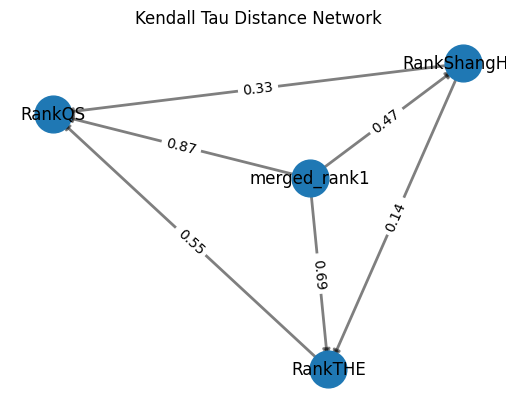

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import seaborn as sns

rank_name_list = ['merged_rank1', 'RankShangHai', 'RankTHE', 'RankQS']


sub_rank = aaaa.loc[:, rank_name_list]

tau = np.zeros([sub_rank.shape[1], sub_rank.shape[1]])
for i in range(sub_rank.shape[1]):
    for j in range(sub_rank.shape[1]):
        tau[i, j], _ = kendalltau(sub_rank.iloc[:, i], sub_rank.iloc[:, j])

G = nx.DiGraph()

# Add nodes for each ranking
for rank_name in rank_name_list:
    G.add_node(rank_name)

# Add edges between rankings with non-zero Kendall Tau distance
for i in range(len(rank_name_list)):
    for j in range(i+1, len(rank_name_list)):
        tau_value = tau[i][j]
        if tau_value != 0:
            G.add_edge(rank_name_list[i], rank_name_list[j], weight=tau_value)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2, arrows=True, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})
plt.title('Kendall Tau Distance Network')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def compare_and_select(rank, rank_name1, rank_name2, rank_name3, index):
    return_rank = rank.copy()
    return_rank['gap1'] = abs(index - return_rank[rank_name1])
    return_rank['gap2'] = abs(index - return_rank[rank_name2])
    return_rank['gap3'] = abs(index - return_rank[rank_name3])
    return_rank['total'] = np.minimum(return_rank['gap1'], return_rank['gap2'])
    return_rank['total'] = np.minimum(return_rank['total'], return_rank['gap3'])
    return return_rank

def build_rank(rank, rank_name1, rank_name2, rank_name3):
    selected_names = []
    rank_copy = rank.copy()
    for i in range(rank_copy.shape[0]):    
        comparison_result = compare_and_select(rank, rank_name1, rank_name2, rank_name3, i)
        comparison_result = comparison_result[~comparison_result['Name'].isin(selected_names)]
        min_value_index = comparison_result['total'].idxmin()
        selected_names.append(comparison_result.loc[min_value_index]['Name'])
        df = pd.DataFrame(selected_names, columns=['Name']).reset_index()
        df = df.rename(columns={'index': 'merged_rank1'})
        df = pd.merge(rank_copy, df, on='Name')
    return df

rank_result = build_rank(RankMJ1.reset_index(), 'RankQS', 'RankTHE', 'RankShangHai')


In [ ]:
from scipy.stats import kendalltau
import numpy as np
import pandas as pd
from scipy.stats import rankdata

def _kendall_convert_coef_to_dist(tau_coef):
    '''Convert Kendall correlation coefficient to normalized distance'''
    return (1 - tau_coef) / 2

def kendalldist(*args, **kwargs):
    '''Return the normalized Kendall tau distance (0 <= tau <= 1)
    This function wraps around scipy.stats.kendalltau()
    and forwards all arguments to that function.
    '''
    tau_coef, p_value = kendalltau(*args, **kwargs)
    return _kendall_convert_coef_to_dist(tau_coef)

def compair(rank, rank_name1, rank_name2, rank_name3, index):
    return_rank = rank.copy()
    index_rank = rankdata(rank.index)  # Use the default index
    return_rank['dist1'] = kendalldist(index_rank, return_rank[rank_name1])
    return_rank['dist2'] = kendalldist(index_rank, return_rank[rank_name2])
    return_rank['dist3'] = kendalldist(index_rank, return_rank[rank_name3])
    return_rank['total'] = np.mean(return_rank[['dist1', 'dist2', 'dist3']], axis=1)
    return return_rank

def construi(rank, rank_name1, rank_name2, rank_name3):
    return_list = []
    rankcopy = rank.copy()
    for i in range(rankcopy.shape[0]):
        aa = compair(rank, rank_name1, rank_name2, rank_name3, i)
        aa = aa[~aa['Name'].isin(return_list)]
        min_value_index = aa['total'].idxmin()
        return_list.append(aa.loc[min_value_index]['Name'])
    
    df = pd.DataFrame(return_list, columns=['Name'])
    df['Heuristic2_rank'] = rankcopy.loc[df['Name'], 'total'].rank()
    df = pd.merge(rankcopy, df, on='Name')
    return df

RankMJ1 = RankMJ1.dropna()  # Drop rows with nan values
aaaa2 = construi(RankMJ1.reset_index(), 'RankQS', 'RankTHE', 'RankShangHai')